### Week 16: 

- **Reuse the code where the model hyperparameters are optimized.** 
  - Try another model, any model you rebember from IA1.

- **With group 1: we optimized the hyperparameters of a classifier** 
  - Group 2 will optmize a **regressor**, any model you rebember from IA1.

- Your result should look like the figure below (with the corresponding Model and hyperparameters).
  - MLP: hidden neurons, learning rate, activation function (relu), decay, etc.
  - ML: decay, regularization. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from PIL import Image

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [9]:
# Nuestra imagen está en escala de grises
img = Image.open('data/H14_093304.jpg')  # cargar imagen
img.size  # tamaño de la imagen

(4128, 3096)

In [5]:
# obtenemos el centro de la imagen
w, h = (np.array(img.size) // 2)
w, h

(2064, 1548)

In [7]:
# Recorte de la imagen, a partir del centro
# nuevas dimensiones (tamaño de recorte)
cw, ch = 660, 660  # nuevo tamaño

# recorte a partir del centro mitad nueveo alto/ancho
box = (w-cw)//2, (h-ch)//2, (w+cw)//2, (h+ch)//2
box  # caja de recorte

(702, 444, 1362, 1104)

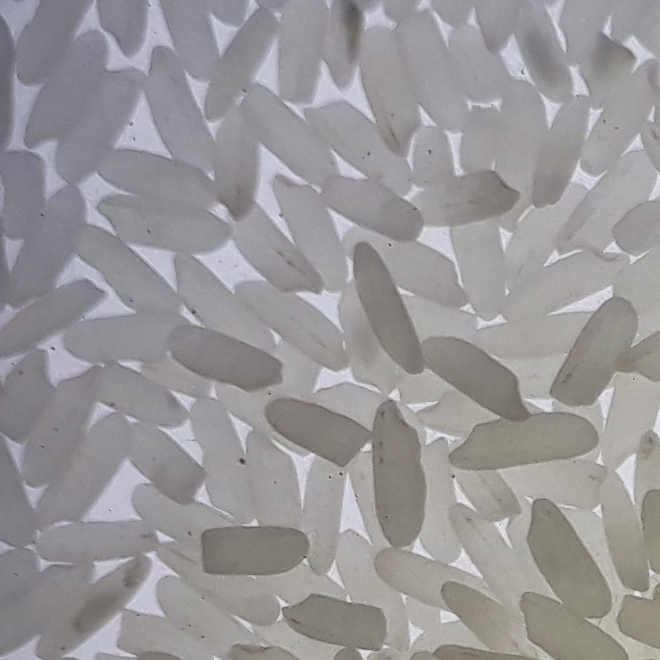

In [8]:
img_cropped = img.crop(box)
img_cropped

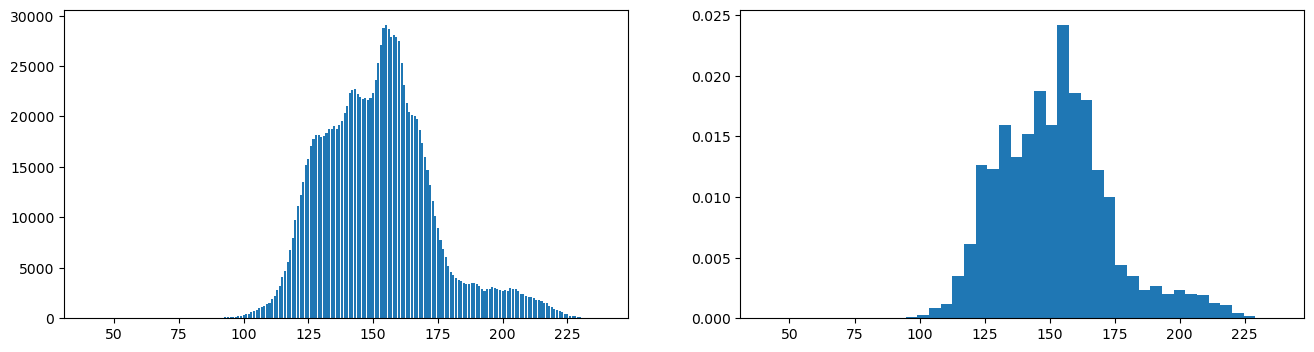

In [10]:
# Transformar array 2D a 1D
pixels = np.array(img_cropped).flatten()
# Construir diagrama de barras con 256 bins
# En una imagen en escala de grises cada pixel contiente un valor entre 0 y 255
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.bar(*np.unique(pixels, return_counts=True))

# Construir histograma con 44 bins
plt.subplot(1,2,2)
h = plt.hist(pixels, bins=44, density=True)

In [12]:
# Las alturas de histograma serán nuestro vector de entrada X
h[0], len(h[0])  # h[0] altura del histograma

(array([5.12741629e-07, 5.12741629e-07, 3.41827753e-07, 1.02548326e-06,
        8.54569382e-07, 3.41827753e-07, 1.88005264e-06, 2.90553590e-06,
        7.86203832e-06, 1.36731101e-05, 3.11063255e-05, 4.75140577e-05,
        1.28527235e-04, 2.85084346e-04, 8.20386607e-04, 1.20528466e-03,
        3.47279906e-03, 6.10606915e-03, 1.26219898e-02, 1.23066537e-02,
        1.59059290e-02, 1.32931686e-02, 1.51551043e-02, 1.86971235e-02,
        1.59069545e-02, 2.41826044e-02, 1.85904733e-02, 1.79627066e-02,
        1.22603360e-02, 1.00382847e-02, 4.43042951e-03, 3.49365055e-03,
        2.37057547e-03, 2.68334786e-03, 2.04071169e-03, 2.36630262e-03,
        1.96123673e-03, 1.91132988e-03, 1.26322446e-03, 1.07727016e-03,
        4.41470543e-04, 2.11078637e-04, 4.34121246e-05, 8.20386607e-06]),
 44)

In [13]:
data = pd.read_csv('https://raw.githubusercontent.com/marsgr6/r-scripts/master/data/G03_cropG_H_660_660_44_bins.csv')
data.humidity = data.humidity.astype(str)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,humidity
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.012158,0.044333,0.354619,0.098181,0.124926,0.136753,0.008118,0.000009,0.000000,10
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.014039,0.018889,0.141064,0.151785,0.089501,0.119041,0.040481,0.001417,0.000000,10
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.018064,0.023848,0.141680,0.120306,0.108169,0.121783,0.027558,0.000676,0.000000,10
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.029847,0.022650,0.035885,0.074686,0.087595,0.107312,0.082734,0.014666,0.000054,10
4,0.0,0.0,0.0,0.000009,0.0,0.000009,0.000027,0.000018,0.000045,0.00009,...,0.015860,0.043084,0.339896,0.143472,0.115284,0.128973,0.035604,0.001162,0.000000,10


In [ ]:
data.iloc[:,:-1].describe()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,0.000014,0.000028,0.000065,0.000128,0.000214,0.000966,0.005213,0.001067,0.000116,0.000171,...,0.027661,0.031278,0.087876,0.190515,0.112837,0.103457,0.116627,0.032822,0.001430,0.000002
std,0.000114,0.000201,0.000394,0.000689,0.001124,0.007024,0.035924,0.006590,0.000315,0.000339,...,0.023420,0.031301,0.091787,0.095035,0.032029,0.020023,0.048207,0.023983,0.002411,0.000012
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007444,0.007756,0.011540,0.028937,0.037259,0.043105,0.007829,0.000086,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.012980,0.014053,0.027827,0.125638,0.089162,0.090107,0.082844,0.010775,0.000047,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000015,...,0.020033,0.019908,0.046835,0.171026,0.108850,0.102421,0.123879,0.030658,0.000638,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000033,0.000081,0.000188,...,0.028884,0.037133,0.108597,0.247400,0.133112,0.114255,0.151436,0.049145,0.001721,0.000000
max,0.001474,0.002317,0.003440,0.004835,0.009255,0.090649,0.377729,0.075797,0.002356,0.001916,...,0.141751,0.253941,0.415862,0.537803,0.236872,0.181483,0.234865,0.116686,0.018232,0.000134


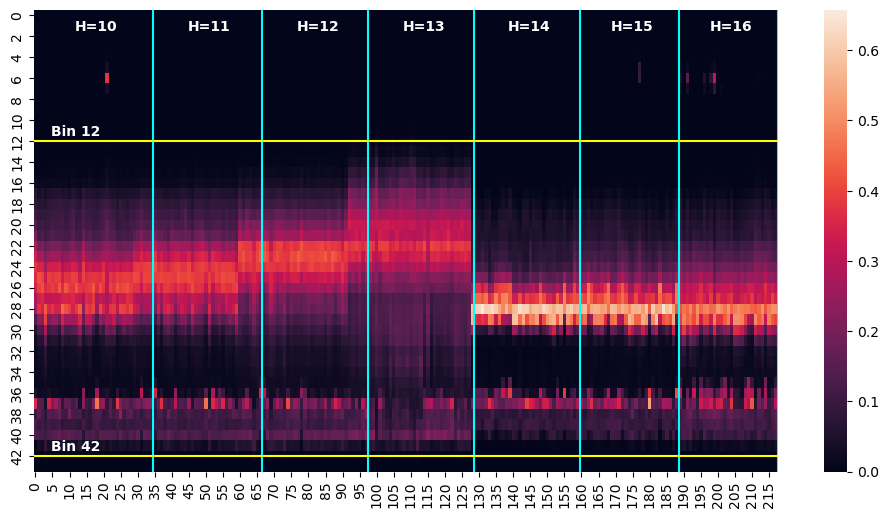

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(data.iloc[:,:-1].T)
t = list(data.humidity.unique())
x = list(data.humidity.value_counts().cumsum())
c = list(data.humidity.value_counts())
plt.vlines(x,
           data.humidity.nunique()*[0],
           data.shape[0]*data.humidity.nunique(), colors="cyan")
plt.hlines([12.5, 42.5], [0, 0], [218, 218], colors="yellow")
[plt.text(v[0]-v[2]//2-6, 2, 'H='+v[1], c='white', fontweight="bold") for v in zip(x, t, c)];
plt.text(5, 12, 'Bin 12', c='white', fontweight="bold");
plt.text(5, 42, 'Bin 42', c='white', fontweight="bold");
plt.show()

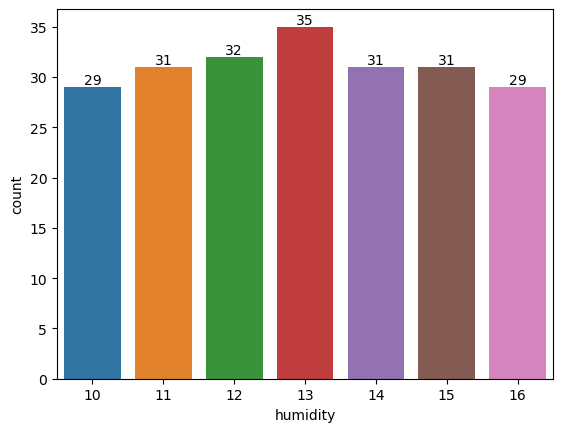

In [20]:
ax = sns.countplot(x='humidity', data=data)
ax.bar_label(ax.containers[0]);

<Axes: xlabel='humidity', ylabel='22'>

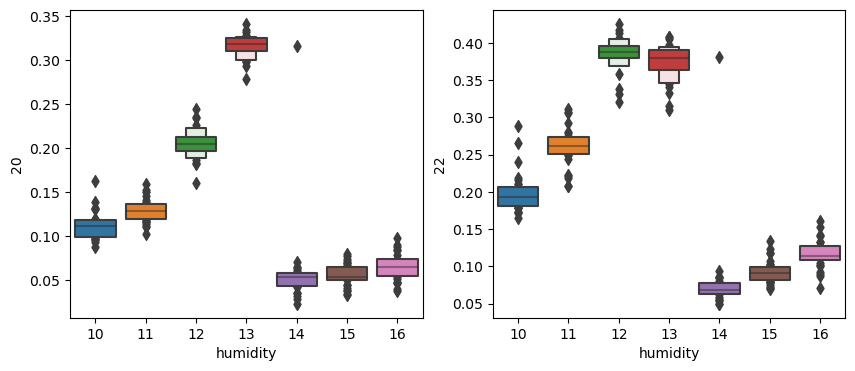

In [21]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxenplot(data=data, x='humidity', y='20')
plt.subplot(1,2,2)
sns.boxenplot(data=data, x='humidity', y='22')

<Axes: xlabel='22', ylabel='Density'>

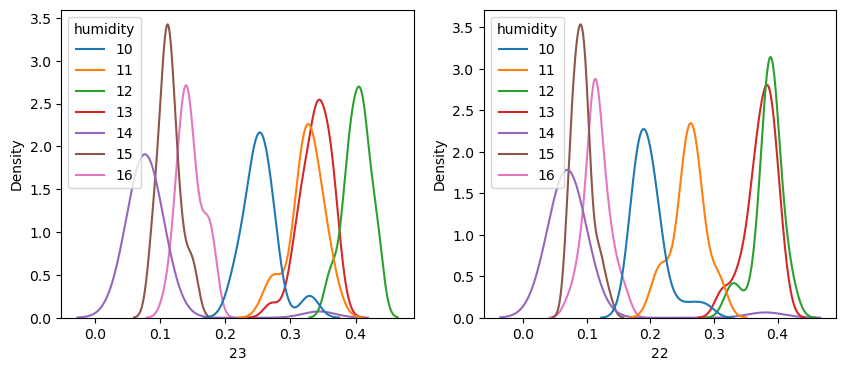

In [22]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.kdeplot(data=data, hue='humidity', x='23')
plt.subplot(1,2,2)
sns.kdeplot(data=data, hue='humidity', x='22')

<Axes: xlabel='22', ylabel='23'>

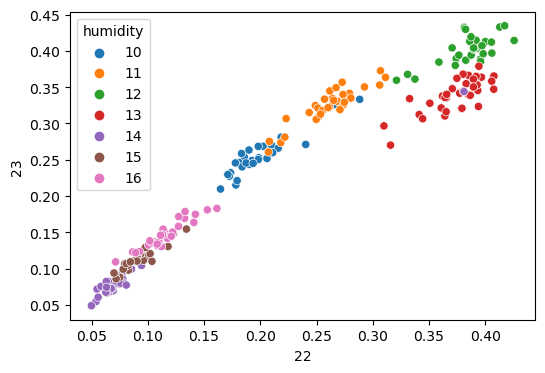

In [23]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=data, x='22', y='23', hue='humidity')

**The graph above will not be as beatiful as mine.**
- You better use dimensionality reduction to Visualize class separation
  - https://nbviewer.org/github/marsgr6/EN-online/blob/main/dimensionality_reduction.ipynb


### Instructions

**Step -1**

- Write a Title and Abstract
- Make up a plausible application introduction

**Step 0**

- Describe your dataset and how you built it. **This was the pattern preprocessing homework.** 
  - Detail the process to get the dataset above.

- Explore (Visualize) your dataset
  - Use PCA, t-SNE
  - Check: https://leonardoaraujosantos.gitbook.io/artificial-inteligence/machine_learning/unsupervised_learning

**Scenarios**

- Build two types of problems (models):
  - **First**: Classifiers. Classes are the humidity level $h \in \{10,11, \dots, 16 \}$
  - **Second**: Regressors. Round to the nearest integer, i.e.: 8.9 would be 10, 16.8 would be 16.
  - Set limits for the regressor ouput $\hat{y}$.
    - If $\hat{y} < 10$, make $\hat{y} = 10$.
    - If $\hat{y} > 16$, make $\hat{y} = 16$.

**Model for each scenario**

- Perform the usual steps to build a ML model.
  - **Select ML algorithm (from MLP, RandomForest, XGBoost, and research others, select at least 2).**
  - Preprocess the input accordingly. 
  - Build (train) the model 
    - Hyperparameter optimization 
  - Evaluate (test) the models (classification or regression)
    - Cross validation

- Conclude

- **Check:** Determination of Moisture in Rice Grains Based on Visible Spectrum Analysis
  - https://www.mdpi.com/2073-4395/12/12/3021
  - https://www.featureranking.com/tutorials/machine-learning-tutorials/

- Check my jamboard:
  - https://jamboard.google.com/d/1cVZMkqhB2pj_JceIUQD-ddXzG4d0QeX3p-sE_-JdyeI/viewer?f=18


In [ ]:
# Get X and labels y
X = data.iloc[:,:-1]
y = data['humidity']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

# Create a Random Forest Classifier with default parameters
clf=RandomForestClassifier()

# Train the model using the whole dataset and default parameters
clf.fit(X, y)

y_pred=clf.predict(X)

print(classification_report(y, y_pred))

confusion_matrix(y, y_pred)

              precision    recall  f1-score   support

          10       1.00      1.00      1.00        29
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        35
          14       1.00      1.00      1.00        31
          15       1.00      1.00      1.00        31
          16       1.00      1.00      1.00        29

    accuracy                           1.00       218
   macro avg       1.00      1.00      1.00       218
weighted avg       1.00      1.00      1.00       218



array([[29,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0, 31,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0, 29]])

### Cross validation

- See: https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-4-cross-validation-and-hyperparameter-tuning/

In [ ]:
# We will perform a hyperparamter optimization
# Using KFold cross validation 
from sklearn.model_selection import KFold

# This is 10-fold cross validation
cv_method = KFold(n_splits=10)  # change n_splits for your dataset

### Check random forest

- See: https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725

- Check the hyper-parameters
  - Justify why you are optimizing that set of parameters (cite reference).

In [ ]:
# These are the hyper-parameter values to test
params_RF = {'n_estimators': [40, 70, 100, 200, 300, 400, 500, 1000], 
              'criterion': ['gini', 'entropy']}

![](https://miro.medium.com/max/828/0*yDmmJmvRowl0cSN8.webp)



![CV](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/K-fold_cross_validation_EN.svg/1920px-K-fold_cross_validation_EN.svg.png)

- Define your paremeters (what is **estimators**)
- What is the splitting criterion (What is **Gini**, What is **Entropy**)

In [ ]:
from sklearn.model_selection import GridSearchCV

gs_RF = GridSearchCV(estimator=RandomForestClassifier(),  # Select another estimator
                     param_grid=params_RF,  # change according your model (estimator)
                     cv=cv_method,  # keep it
                     verbose=1,  # verbose: the higher, the more messages
                     scoring='accuracy', 
                     return_train_score=True)

In [ ]:
gs_RF.fit(X, y)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [40, 70, 100, 200, 300, 400, 500,
                                          1000]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
results_RF = pd.DataFrame(gs_RF.cv_results_['params'])
results_RF['accuracy'] = gs_RF.cv_results_['mean_test_score']
results_RF

,criterion,n_estimators,accuracy
0,gini,40,0.801732
1,gini,70,0.811255
2,gini,100,0.797835
3,gini,200,0.825108
4,gini,300,0.824892
5,gini,400,0.816017
6,gini,500,0.811255
7,gini,1000,0.820563
8,entropy,40,0.778788
9,entropy,70,0.824892


{'criterion': 'gini', 'n_estimators': 200}

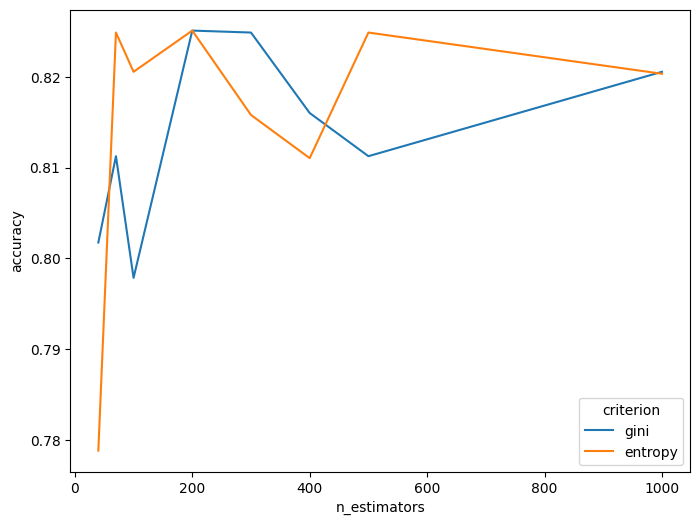

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(data=results_RF, x='n_estimators', y='accuracy', hue='criterion')
gs_RF.best_params_

In [ ]:
best_params = []
for i in range(10):
    gs_RF.fit(X, y)
    best_params += [gs_RF.best_params_]
best_params

Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[{'criterion': 'gini', 'n_estimators': 100},
 {'criterion': 'entropy', 'n_estimators': 100},
 {'criterion': 'entropy', 'n_estimators': 400},
 {'criterion': 'gini', 'n_estimators': 500},
 {'criterion': 'gini', 'n_estimators': 40},
 {'criterion': 'gini', 'n_estimators': 70},
 {'criterion': 'entropy', 'n_estimators': 70},
 {'criterion': 'gini', 'n_estimators': 500},
 {'criterion': 'entropy', 'n_estimators': 400},
 {'criterion': 'gini', 'n_estimators': 100}]

In [ ]:
# This is the final model you want to deploy
from sklearn.model_selection import cross_val_score

# Try for the above results:
best_RF1 = RandomForestClassifier(n_estimators=500, criterion='entropy')

best_RF2 = RandomForestClassifier(n_estimators=300, criterion='gini')

scores1 = cross_val_score(best_RF1, X, y, cv=cv_method)
scores2 = cross_val_score(best_RF2, X, y, cv=cv_method)
scores1, scores2

(array([0.54545455, 0.90909091, 0.86363636, 1.        , 0.95454545,
        0.90909091, 0.68181818, 0.86363636, 0.76190476, 0.66666667]),
 array([0.54545455, 0.90909091, 0.86363636, 1.        , 0.95454545,
        0.90909091, 0.63636364, 0.77272727, 0.76190476, 0.66666667]))

In [ ]:
# This is the summary of the 2 10 fold cv models above
data_acc = pd.DataFrame({'accuracy': np.concatenate((scores1, scores2)), 
'model': ['RF1']*10 + ['RF2']*10})

data_acc

,accuracy,model
0,0.545455,RF1
1,0.909091,RF1
2,0.863636,RF1
3,1.000000,RF1
4,0.954545,RF1
5,0.909091,RF1
6,0.681818,RF1
7,0.863636,RF1
8,0.761905,RF1
9,0.666667,RF1


### Evaluate all your models and scenarios, and find the best. 

- Figure below and comment. 

<AxesSubplot:xlabel='model', ylabel='accuracy'>

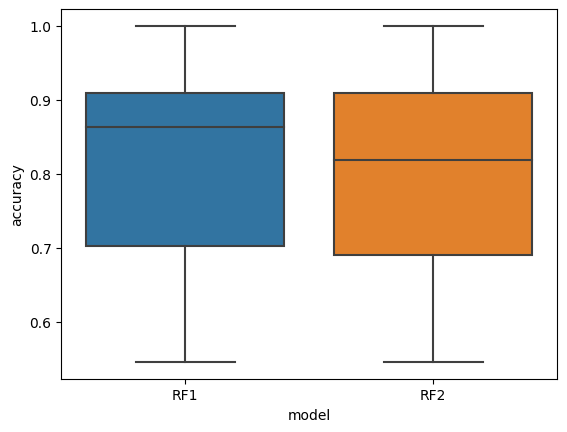

In [ ]:
sns.boxplot(data_acc, x='model', y="accuracy")

In [ ]:
pd.DataFrame(data_acc.groupby('model').mean())

,accuracy
model,
RF1,0.815584
RF2,0.801948


In [ ]:
data_acc.groupby('model').min(), data_acc.groupby('model').max()

(       accuracy
 model          
 RF1    0.545455
 RF2    0.545455,
        accuracy
 model          
 RF1         1.0
 RF2         1.0)

In [ ]:
# Build final model with the whole dataset
best_RF2 = RandomForestClassifier(n_estimators=300, criterion='gini')

best_RF2.fit(X, y)

y_pred = best_RF2.predict(X)

print(classification_report(y, y_pred))

confusion_matrix(y, y_pred)

              precision    recall  f1-score   support

          10       1.00      1.00      1.00        29
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        35
          14       1.00      1.00      1.00        31
          15       1.00      1.00      1.00        31
          16       1.00      1.00      1.00        29

    accuracy                           1.00       218
   macro avg       1.00      1.00      1.00       218
weighted avg       1.00      1.00      1.00       218



array([[29,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0, 31,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0, 29]])

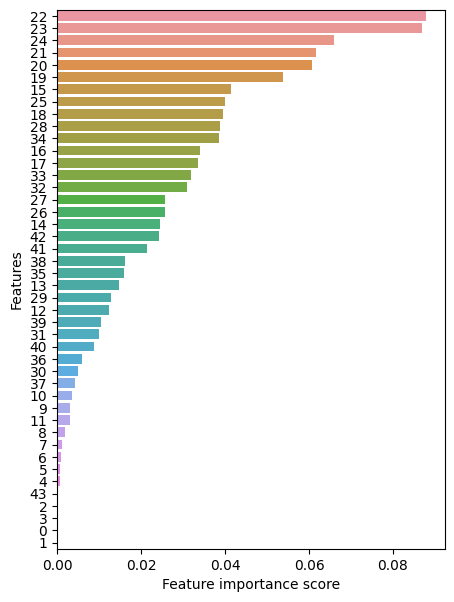

In [ ]:
feature_scores = pd.Series(best_RF2.feature_importances_, index=X.columns).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(5, 7))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#Create a Gaussian Classifier with default parameters
reg = RandomForestRegressor()

#Train the model using the whole dataset and default parameters
reg.fit(X, y)

y_pred = reg.predict(X)

mean_squared_error(y, y_pred)

0.028146330275229347

<AxesSubplot:xlabel='humidity'>

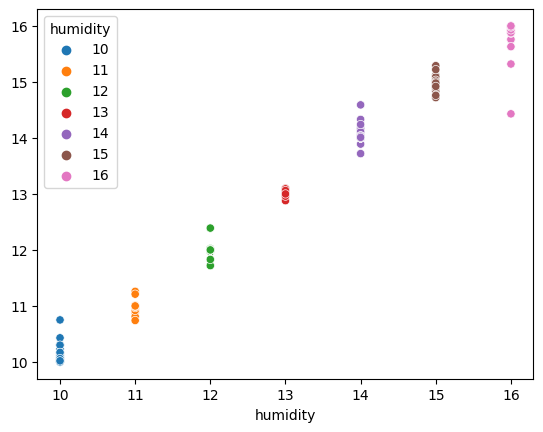

In [ ]:
sns.scatterplot(x=y, y=y_pred, hue=y)

In [ ]:
# Round to nearest integer, DON'T FORGET THE LIMITS OF YOUR PROBLEM
y_pred_r = (np.round(y_pred).astype(int)).astype('str')

print(classification_report(y, y_pred_r)

confusion_matrix(y, y_pred_r)

              precision    recall  f1-score   support

          10       1.00      0.97      0.98        29
          11       0.97      1.00      0.98        31
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        35
          14       0.97      0.97      0.97        31
          15       0.94      1.00      0.97        31
          16       1.00      0.93      0.96        29

    accuracy                           0.98       218
   macro avg       0.98      0.98      0.98       218
weighted avg       0.98      0.98      0.98       218



array([[28,  1,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  1,  0],
       [ 0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  1,  1, 27]])

- Check: https://stackoverflow.com/questions/55113978/what-is-the-difference-between-freidman-mse-and-mse

In [ ]:
# GS and CV were performed for a regression problem
# You can adapt to classification
y_reg = y.astype('int')

# Choose parametes accordingly
params_RF = {'n_estimators': [50, 100, 200, 300, 400, 500], 
              'criterion': ['squared_error', 'absolute_error', 'friedman_mse']}

gs_RF = GridSearchCV(estimator=RandomForestRegressor(),  # change estimator (REGRESSOR), check IA1 models
                     param_grid=params_RF,  # change for your model  (MAY CHANGE FROM CLASSIFIER)
                     cv=cv_method,  # 10 fold cross-validation
                     verbose=1,  # verbose: the higher, the more messages
                     scoring='neg_mean_squared_error',  # MSE (negative*): -f(x)
                     return_train_score=True)

gs_RF.fit(X, y_reg)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse'],
                         'n_estimators': [50, 100, 200, 300, 400, 500]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [ ]:
results_RF = pd.DataFrame(gs_RF.cv_results_['params'])
results_RF['mse'] = np.abs(gs_RF.cv_results_['mean_test_score'])
results_RF

,criterion,n_estimators,mse
0,squared_error,50,0.469862
1,squared_error,100,0.478633
2,squared_error,200,0.456399
3,squared_error,300,0.453472
4,squared_error,400,0.470987
5,squared_error,500,0.459075
6,absolute_error,50,0.495431
7,absolute_error,100,0.485598
8,absolute_error,200,0.446999
9,absolute_error,300,0.474435


{'criterion': 'absolute_error', 'n_estimators': 500}

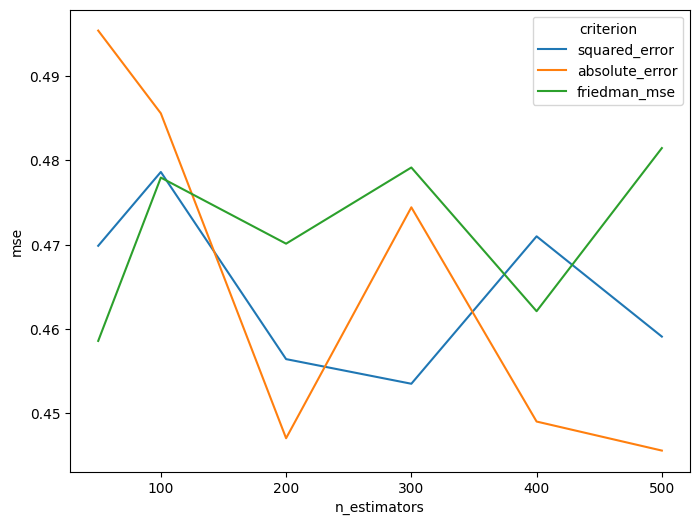

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(data=results_RF, x='n_estimators', y='mse', hue='criterion')
gs_RF.best_params_

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

#Create a Gaussian Classifier
best_RF_reg = RandomForestRegressor(n_estimators=300, criterion='absolute_error')

#Train the model using the whole dataset and default parameters
best_RF_reg.fit(X, y)

y_pred = best_RF_reg.predict(X)

mean_squared_error(y, y_pred)

0.02353109072375129

<AxesSubplot:xlabel='humidity'>

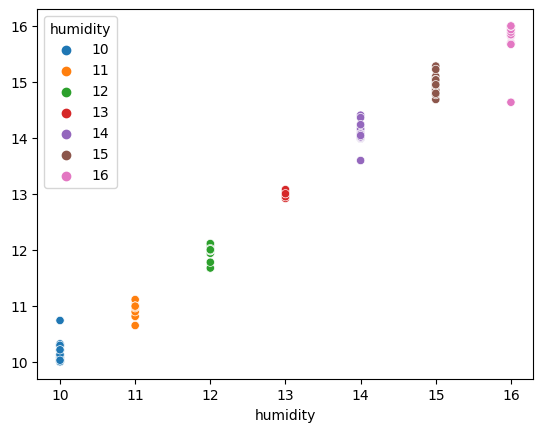

In [ ]:
sns.scatterplot(x=y, y=y_pred, hue=y)

![Picture title](image-20230705-194114.png)

In [ ]:
# Regression result to a class
# Round to nearest integer
# Define the upper and lower bound of your problem and enclosed your result within 
y_pred_r = (np.round(y_pred).astype(int)).astype('str')

print(classification_report(y, y_pred_r))

print(accuracy_score(y, y_pred_r))

confusion_matrix(y, y_pred_r)

              precision    recall  f1-score   support

          10       1.00      0.97      0.98        29
          11       0.97      1.00      0.98        31
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        35
          14       1.00      1.00      1.00        31
          15       0.97      1.00      0.98        31
          16       1.00      0.97      0.98        29

    accuracy                           0.99       218
   macro avg       0.99      0.99      0.99       218
weighted avg       0.99      0.99      0.99       218

0.9908256880733946


array([[28,  1,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0, 31,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  1, 28]])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# CV evaluation
kfold = KFold(n_splits=10)
k = 1
scores_reg = []
for train_index, test_index in kfold.split(X, y):
    # This was my best model
    model = RandomForestRegressor(n_estimators=300, criterion='absolute_error')

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  # predict label
    # Round to nearest integer to evaluate as classification
    # IMPORTANT: Set lower and upper bounds in 10 and 16 respectively
    y_pred_r = (np.round(y_pred).astype(int)).astype('str')
    # Evaluate rounded regression output as a classification 
    scores_reg += [accuracy_score(y_test, y_pred_r)]
    k += 1
scores_reg

[0.36363636363636365,
 0.8636363636363636,
 0.9090909090909091,
 0.7272727272727273,
 0.9545454545454546,
 0.9090909090909091,
 0.6818181818181818,
 0.7727272727272727,
 0.7619047619047619,
 0.5714285714285714]

In [ ]:
accuracy = pd.DataFrame({'accuracy': [0.3181818181818182,
 0.8636363636363636,
 0.9090909090909091,
 0.7272727272727273,
 0.9545454545454546,
 0.9090909090909091,
 0.6818181818181818,
 0.7272727272727273,
 0.7619047619047619,
 0.5714285714285714] + 
 [0.54545455, 0.90909091, 0.86363636, 1.        , 0.95454545,
  0.90909091, 0.63636364, 0.86363636, 0.76190476, 0.66666667], 
  'model': ['Regression']*10 + ['Classification']*10})

,accuracy
model,
Classification,0.811039
Regression,0.742424


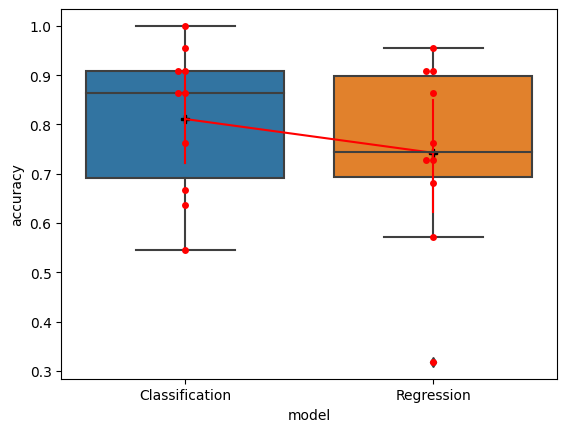

In [ ]:
sns.boxplot(accuracy, x='model', y="accuracy", order=["Classification", "Regression"])
plt.plot(accuracy.groupby('model').mean(), 'Pk')
sns.lineplot(accuracy, x='model', y="accuracy", err_style="bars", c="red")
sns.swarmplot(accuracy, x='model', y="accuracy", c="red")
accuracy.groupby('model').mean()

<AxesSubplot:xlabel='model', ylabel='accuracy'>

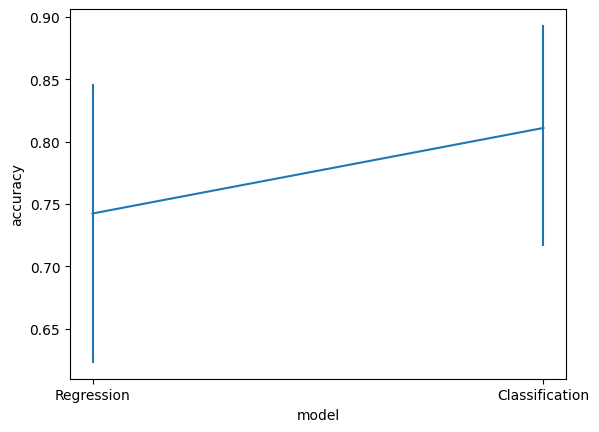

In [ ]:
sns.lineplot(accuracy, x='model', y="accuracy", err_style="bars")

### Automate the process using pipelines

Check: 
- Notebook: 
  - https://deepnote.com/workspace/mario-gonzalez-911d-e512259f-42a9-4514-8972-e208f19e4b48/project/ai2202210-cce3455d-da08-4c10-a6fe-39f2a30c6a51/%2FDemo_Pipeline_GridSearchCV.ipynb
- Video:
  - https://udlaec.sharepoint.com/:v:/s/Section_1073273520/ETRlNiExakJOnYO3dDh5hGwB-1kro5NtZuv5H0uK-YLq7Q?e=aHIvpD

### Deploy

- Check: https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-5-advanced-topics-pipelines-statistical-model-comparison-and-model-deployment/

**Try to automate the process using pipelines according the link above.**